<a href="https://colab.research.google.com/github/educbd/Capstone_Project/blob/main/MIMIC_IV_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIMIC-IV**

**Medical Information Mart for Intensive Care IV** (MIMIC-IV) is a relational database containing real hospital stays for patients admitted to a tertiary academic medical center in Boston, MA, USA. MIMIC-IV contains comprehensive information for each patient while they were in the hospital: laboratory measurements, medications administered, vital signs documented, and so on.

---
### Dataset 1: The _diagnosis_ table.
It provides billed diagnoses for patients. Diagnoses are determined after discharge from the emergency department.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# The diagnosis table
dx = pd.read_csv("https://github.com/educbd/Capstone_Project/raw/main/diagnosis.csv.gz")

In [2]:
dx.shape

(545, 6)

In [3]:
dx.sample(3)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
39,10018081,37593892,3,42731,9,ATRIAL FIBRILLATION
455,10040025,31226423,4,Z794,10,Long term (current) use of insulin
123,10026354,31200743,3,X991XXA,10,"Assault by knife, initial encounter"


---
### Dataset 2: The _edstays_ table.

Is the primary tracking table for emergency department visits. It provides the time the patient entered the emergency department and the time they left the emergency department.

In [4]:
# The edstays table
ed = pd.read_csv("https://github.com/educbd/Capstone_Project/raw/main/edstays.csv.gz")

In [5]:
ed.shape

(222, 9)

In [6]:
ed.sample(3)

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
18,10032725,20611640.0,30701739,2143-03-22 01:19:00,2143-03-22 06:42:00,F,BLACK/AFRICAN AMERICAN,AMBULANCE,ADMITTED
221,10025463,24470193.0,35470228,2137-10-08 18:16:00,2137-10-08 21:20:50,M,WHITE,AMBULANCE,OTHER
116,10002428,28662225.0,32007337,2156-04-12 09:56:00,2156-04-12 14:17:27,F,WHITE,WALK IN,ADMITTED


---
### Dataset 3: The _medrecon_ table.

On admission to the emergency departments, staff will ask the patient what current medications they are taking. This process is called **medicine reconciliation**, and the medrecon table stores the findings of the care providers.

In [7]:
# The medrecon table
md = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/medrecon.csv.gz')

In [8]:
md.shape

(2764, 9)

In [9]:
md.sample(3)

,subject_id,stay_id,charttime,name,gsn,ndc,etc_rn,etccode,etcdescription
1466,10039708,35168275,2143-09-26 08:41:00,allopurinol,2535,11289101302,1,2602.0,Hyperuricemia Therapy - Xanthine Oxidase Inhib...
323,10037928,35156583,2183-08-03 20:46:00,loratadine,18698,10544045530,1,290.0,Antihistamines - 2nd Generation
1121,10014354,30094124,2147-11-14 18:46:00,magnesium oxide,1408,10006070028,1,740.0,Minerals and Electrolytes - Magnesium


---
### Dataset 4: The _pyxis_ table.

Provides information for medicine dispensations made via the Pyxis system.

In [10]:
# The pyxis table
py = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/pyxis.csv.gz')

In [11]:
py.shape

(1082, 7)

In [12]:
py.sample(3)

,subject_id,stay_id,charttime,med_rn,name,gsn_rn,gsn
454,10015860,38566596,2188-08-06 00:56:00,6,Insulin Glargine,1,47780.0
0,10012853,36185653,2175-04-05 06:39:00,4,Aspirin,1,4380.0
927,10005866,31121963,2149-10-01 05:25:00,4,HYDROmorphone (D 1mg/1mL 1mL SYR,1,62823.0


---
### Dataset 5: The _triage_ table.

Contains information about the patient when they were first triaged in the emergency department. Patients are assessed at triage by a single care provider and asked a series of questions to assess their current health status. Their vital signs are measured and a level of acuity is assigned. Based on the level of acuity, the patient either waits in the waiting room for later attention, or is prioritized for immediate care.

In [13]:
tr = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/triage.csv.gz')

In [14]:
tr.shape

(222, 11)

In [15]:
tr.sample(3)

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
123,10020944,39738665,98.0,75.0,24.0,91.0,154.0,67.0,unable,1.0,Altered mental status
81,10015860,31353849,98.2,98.0,18.0,96.0,106.0,64.0,7,2.0,"L Leg pain, s/p Fall"
197,10003400,34948767,99.9,86.0,18.0,100.0,142.0,92.0,5,3.0,"Hematuria, Dysuria"


---
### Dataset 6: The _vitalsign_ table.

Patients admitted to the emergency department have routine vital signs taken ever 1-4 hours.

In [16]:
vs = pd.read_csv('https://github.com/educbd/Capstone_Project/raw/main/vitalsign.csv.gz')

In [17]:
vs.shape

(1038, 11)

In [18]:
vs.sample(3)

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
119,10020187,30689793,2169-01-15 01:41:00,NaN,72.0,17.0,97.0,111.0,64.0,NaN,asleep
302,10022281,39346340,2125-06-17 01:39:00,97.6,60.0,16.0,97.0,163.0,86.0,NaN,8
276,10018423,39057874,2167-04-29 10:04:00,NaN,71.0,NaN,NaN,131.0,99.0,NaN,standing


---
Now we can merge all 6 dataset into a single one:

In [19]:
merged_df = dx.merge(ed, on=['subject_id', 'stay_id'], how='outer')
merged_df = merged_df.merge(md, on=['subject_id', 'stay_id'], how='outer')
merged_df = merged_df.merge(py, on=['subject_id', 'stay_id'], how='outer')
merged_df = merged_df.merge(tr, on=['subject_id', 'stay_id'], how='outer')
df = merged_df.merge(vs, on=['subject_id', 'stay_id'], how='outer')

In [20]:
# All the merged data
df.shape

(284823, 43)

In [21]:
df.sample(3)

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title,hadm_id,intime,outtime,gender,...,chiefcomplaint,charttime,temperature_y,heartrate_y,resprate_y,o2sat_y,sbp_y,dbp_y,rhythm,pain_y
283906,10002428,33227245,1.0,7862,9.0,COUGH,NaN,2155-12-04 18:34:00,2155-12-04 22:23:00,F,...,LARYNGITIS/SOB WITH TALKING,2155-12-04 21:36:00,97.4,82.0,18.0,100.0,148.0,75.0,NaN,0
92603,10014354,35452640,1.0,R079,10.0,"Chest pain, unspecified",26722126.0,2146-11-08 21:24:00,2146-11-09 13:13:00,M,...,"Chest pain, Transfer",2146-11-09 09:50:00,NaN,52.0,20.0,99.0,130.0,54.0,NaN,9
180494,10014354,39633384,4.0,Y9289,10.0,Oth places as the place of occurrence of the e...,24096336.0,2149-06-19 17:01:00,2149-06-20 13:48:00,M,...,"Hyperglycemia, Overdose",2149-06-19 18:21:00,98.1,70.0,14.0,100.0,143.0,92.0,NaN,9


<Axes: >

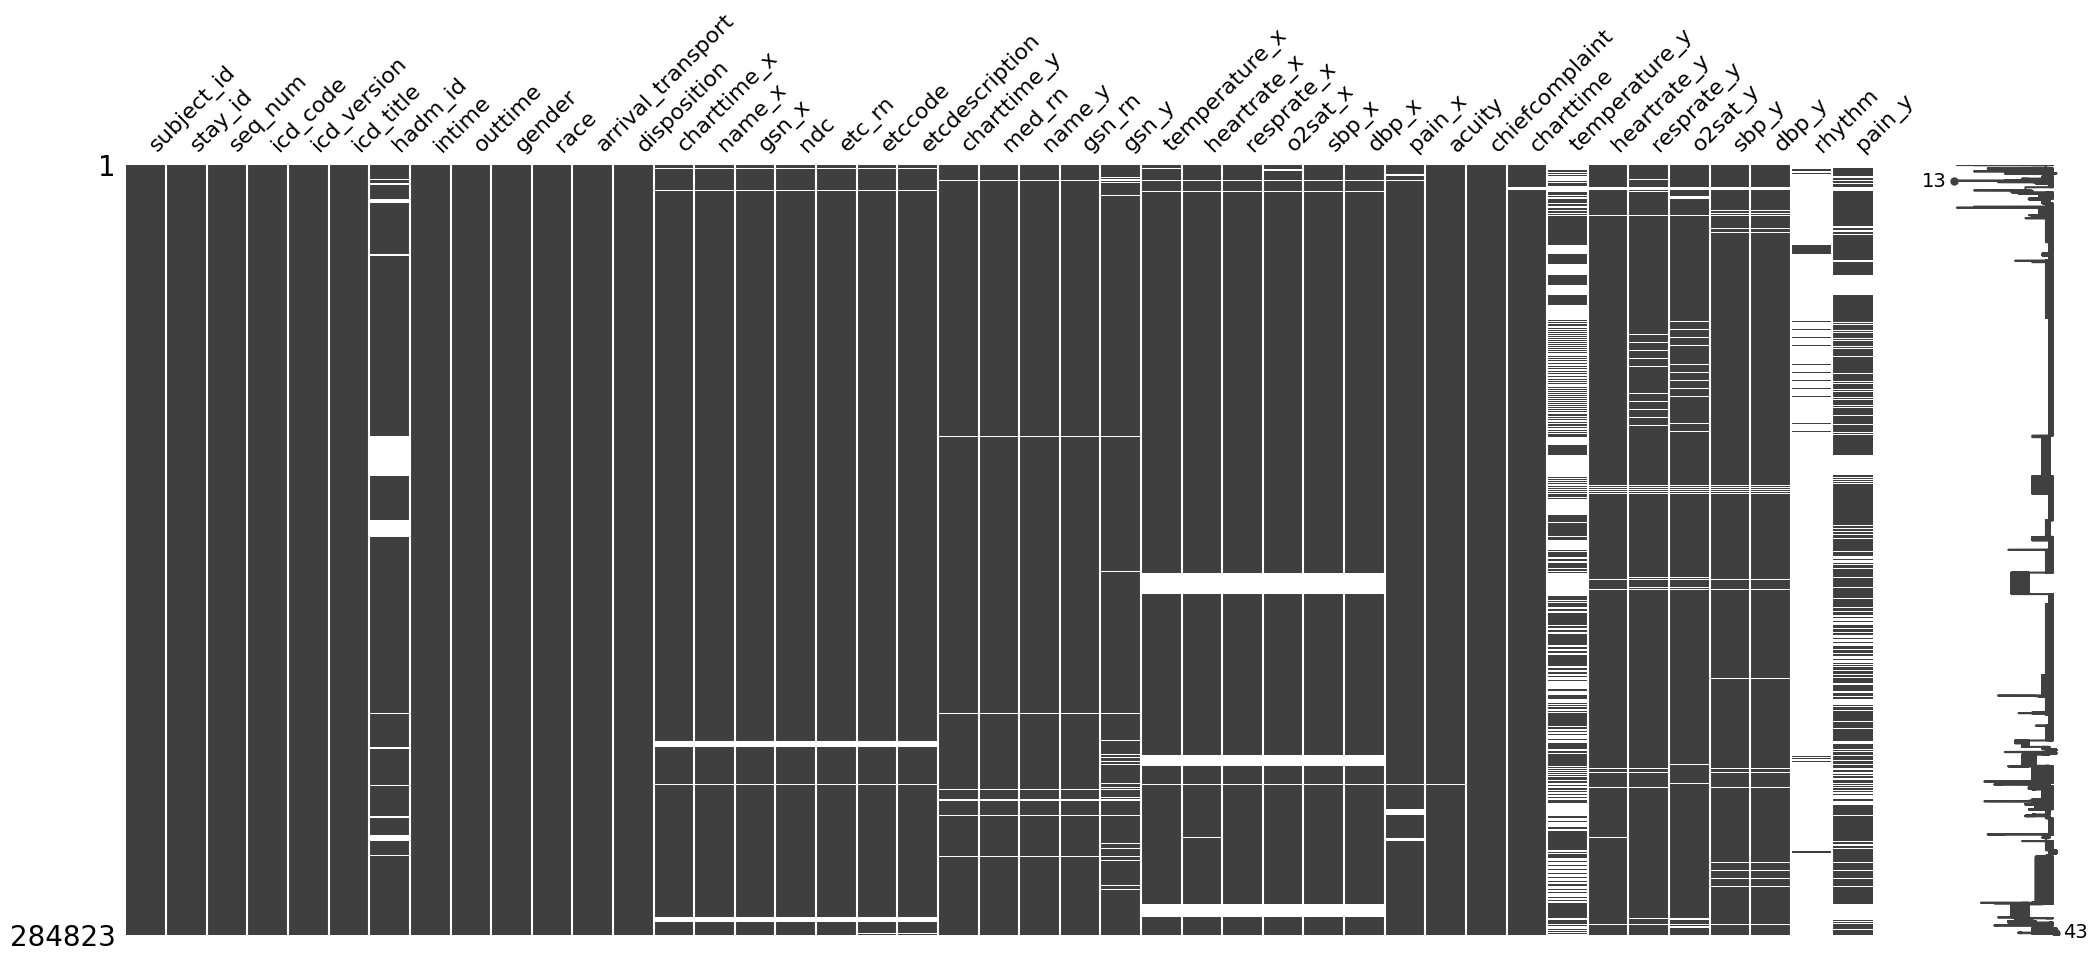

In [22]:
# Plotting null values of the entire dataset:
import missingno as msno
msno.matrix(df)

In [23]:
times = df[['subject_id', 'gender', 'race', 'acuity', 'seq_num', 'intime', 'outtime', 'hadm_id', 'charttime','charttime_x', 'charttime_y', 'pain_x', 'icd_code', 'icd_title']]
times

,subject_id,gender,race,acuity,seq_num,intime,outtime,hadm_id,charttime,charttime_x,charttime_y,pain_x,icd_code,icd_title
0,10025463,M,WHITE,NaN,1.0,2137-10-08 18:16:00,2137-10-08 21:20:50,24470193.0,NaN,NaN,2137-10-08 18:34:00,NaN,431,INTRACEREBRAL HEMORRHAGE
1,10025463,M,WHITE,NaN,1.0,2137-10-08 18:16:00,2137-10-08 21:20:50,24470193.0,NaN,NaN,2137-10-08 19:15:00,NaN,431,INTRACEREBRAL HEMORRHAGE
2,10025463,M,WHITE,NaN,1.0,2137-10-08 18:16:00,2137-10-08 21:20:50,24470193.0,NaN,NaN,2137-10-08 19:15:00,NaN,431,INTRACEREBRAL HEMORRHAGE
3,10027602,F,WHITE,NaN,1.0,2201-10-30 10:48:00,2201-10-30 12:25:00,28166872.0,NaN,NaN,NaN,NaN,431,INTRACEREBRAL HEMORRHAGE
4,10009049,M,WHITE,3.0,1.0,2174-05-26 04:20:00,2174-05-26 09:18:00,22995465.0,2174-05-26 05:31:00,2174-05-26 04:45:00,2174-05-26 08:07:00,0,486,"PNEUMONIA,ORGANISM UNSPECIFIED"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284818,10005909,F,WHITE,2.0,NaN,2144-10-28 18:29:00,2144-10-29 00:10:00,20199380.0,2144-10-28 21:36:00,2144-10-28 19:34:00,2144-10-28 19:23:00,5,NaN,NaN
284819,10005909,F,WHITE,2.0,NaN,2144-10-28 18:29:00,2144-10-29 00:10:00,20199380.0,2144-10-28 18:30:00,2144-10-28 19:34:00,2144-10-28 19:23:00,5,NaN,NaN
284820,10005909,F,WHITE,2.0,NaN,2144-10-28 18:29:00,2144-10-29 00:10:00,20199380.0,2144-10-28 23:33:00,2144-10-28 19:34:00,2144-10-28 19:23:00,5,NaN,NaN
284821,10005909,F,WHITE,2.0,NaN,2144-10-28 18:29:00,2144-10-29 00:10:00,20199380.0,2144-10-28 21:36:00,2144-10-28 19:34:00,2144-10-28 19:23:00,5,NaN,NaN


<Axes: >

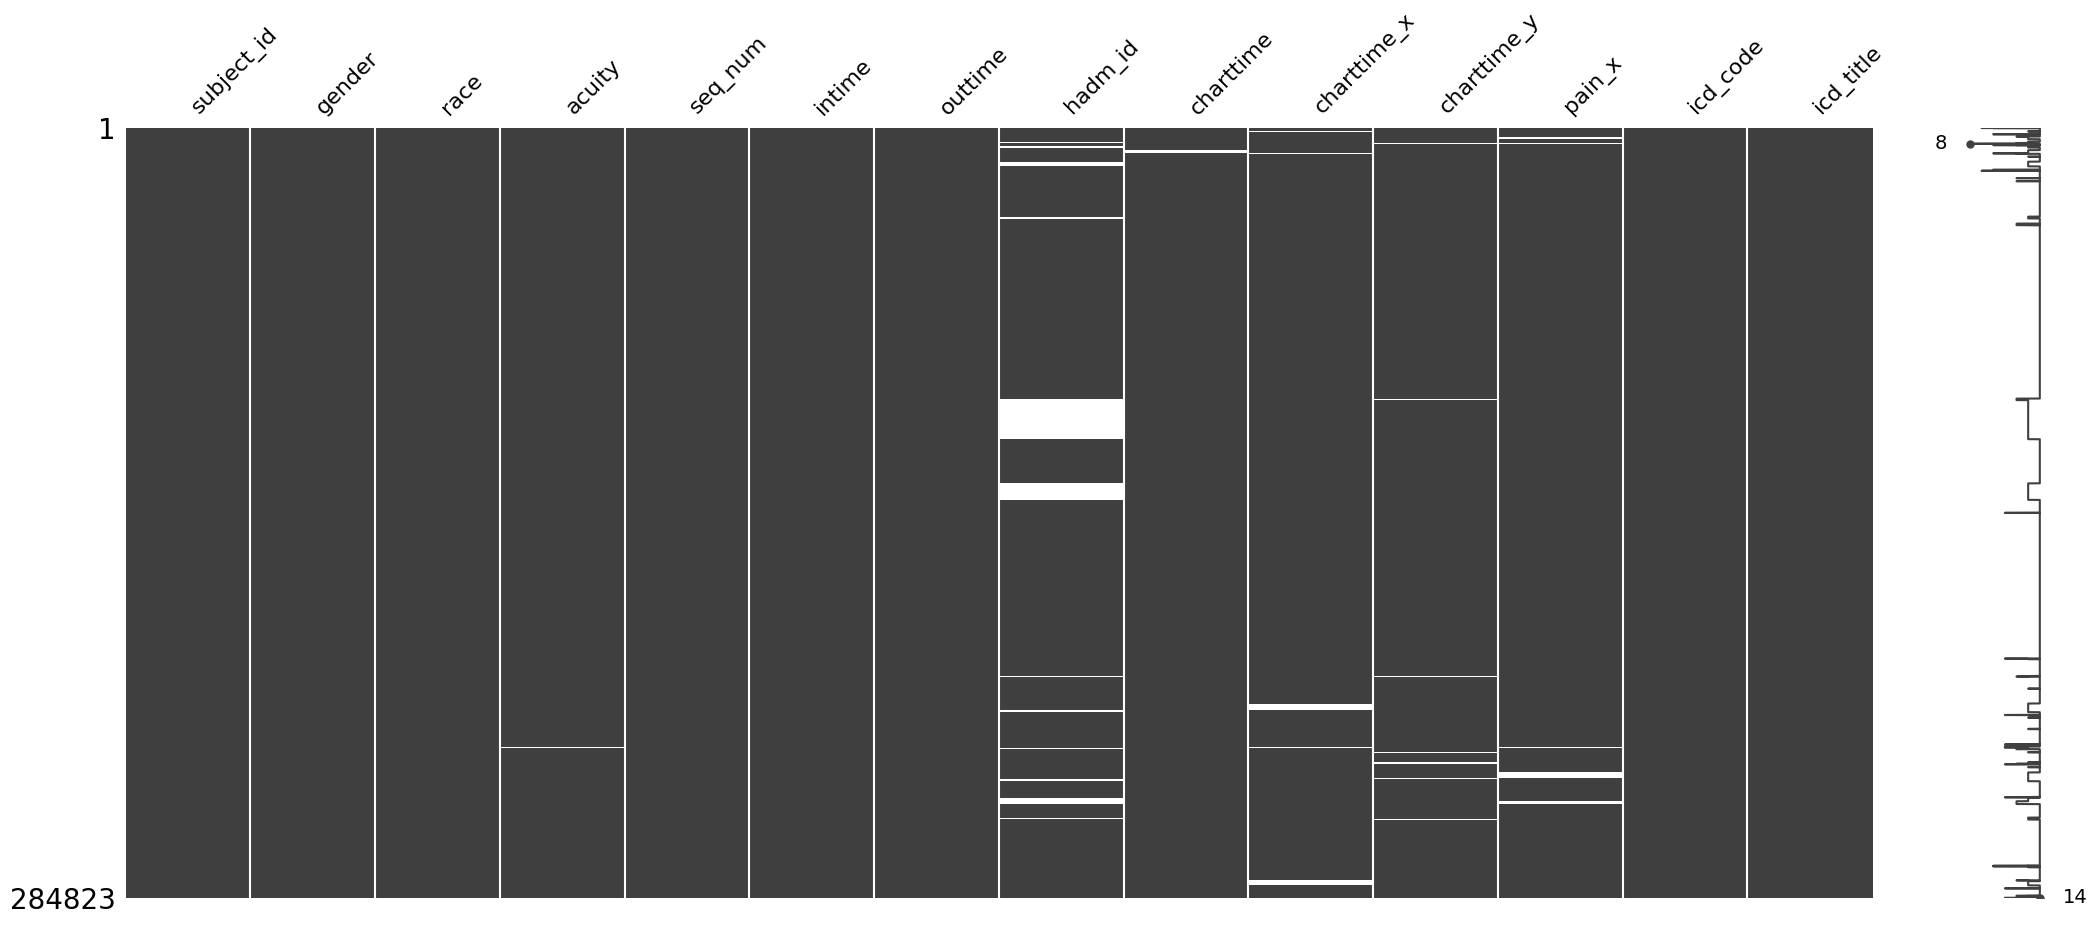

In [24]:
msno.matrix(times)

In [25]:
time = times.drop_duplicates()

<Axes: >

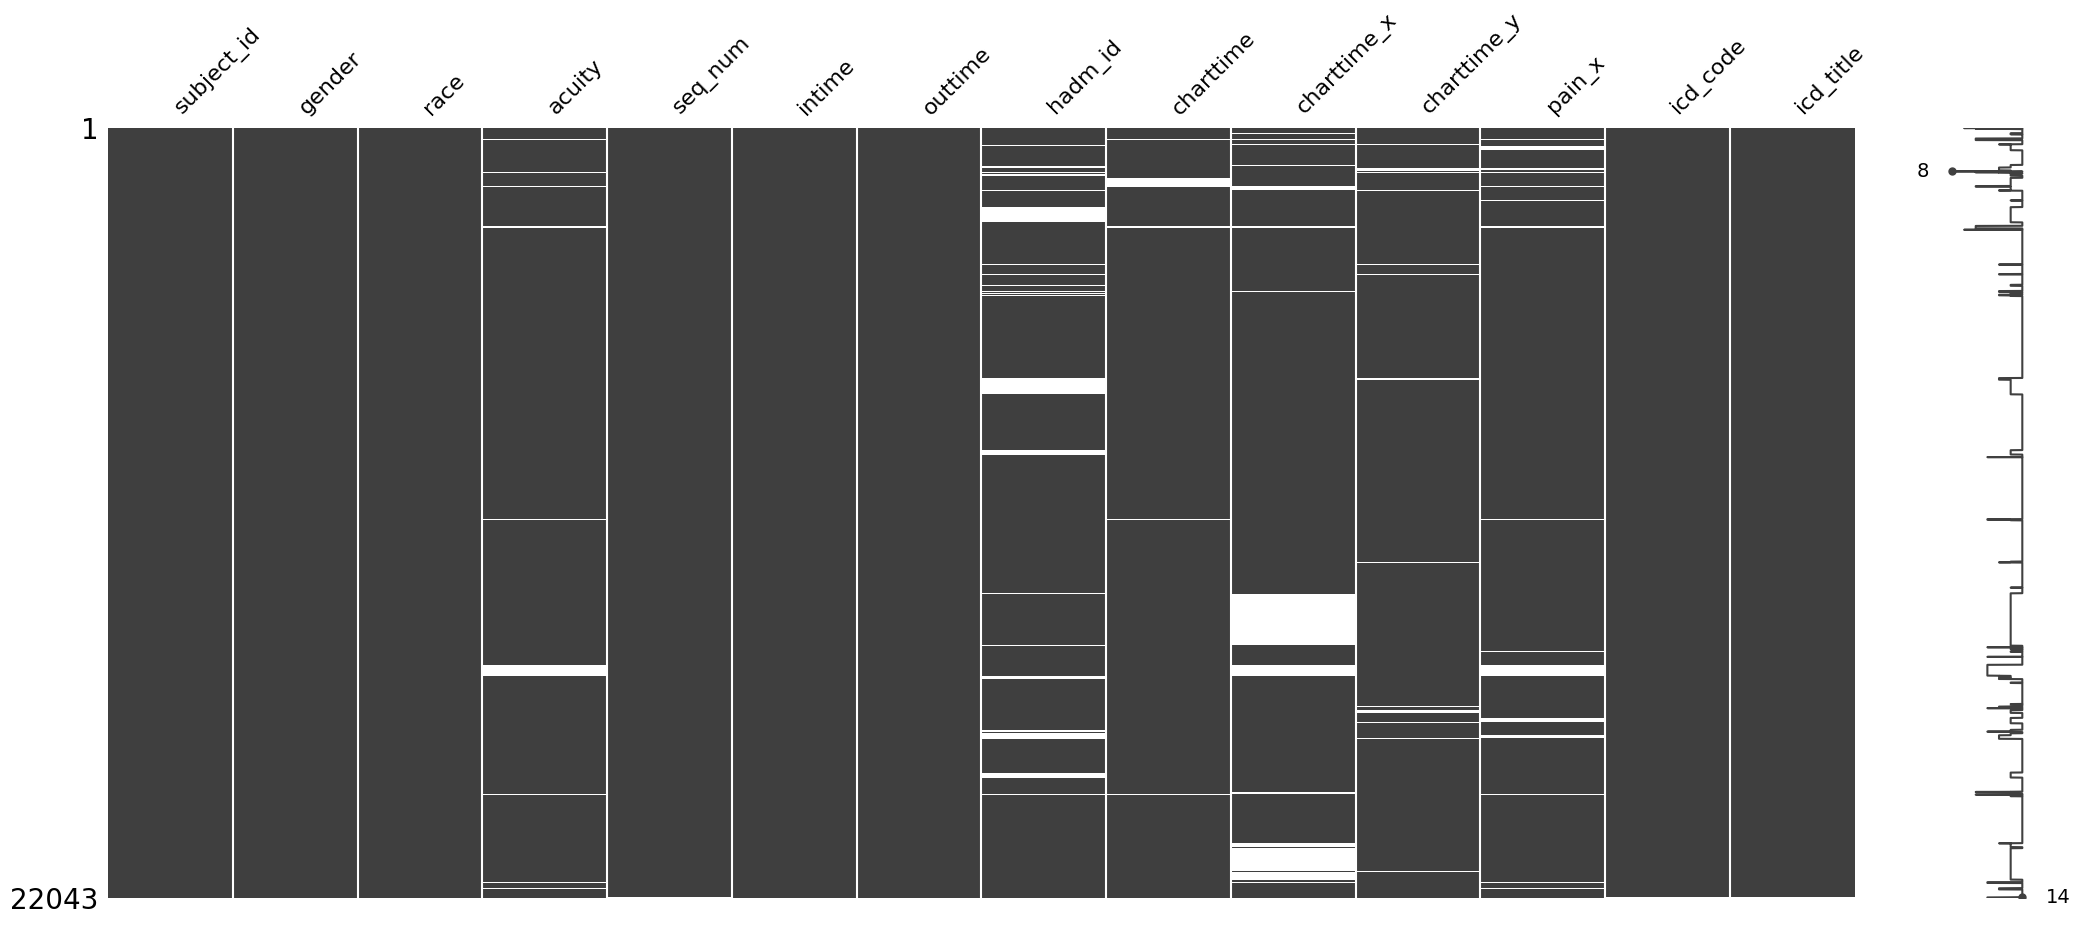

In [26]:
msno.matrix(time)

In [27]:
time['hadm_id'] = time['hadm_id'].fillna(0)

<Axes: >

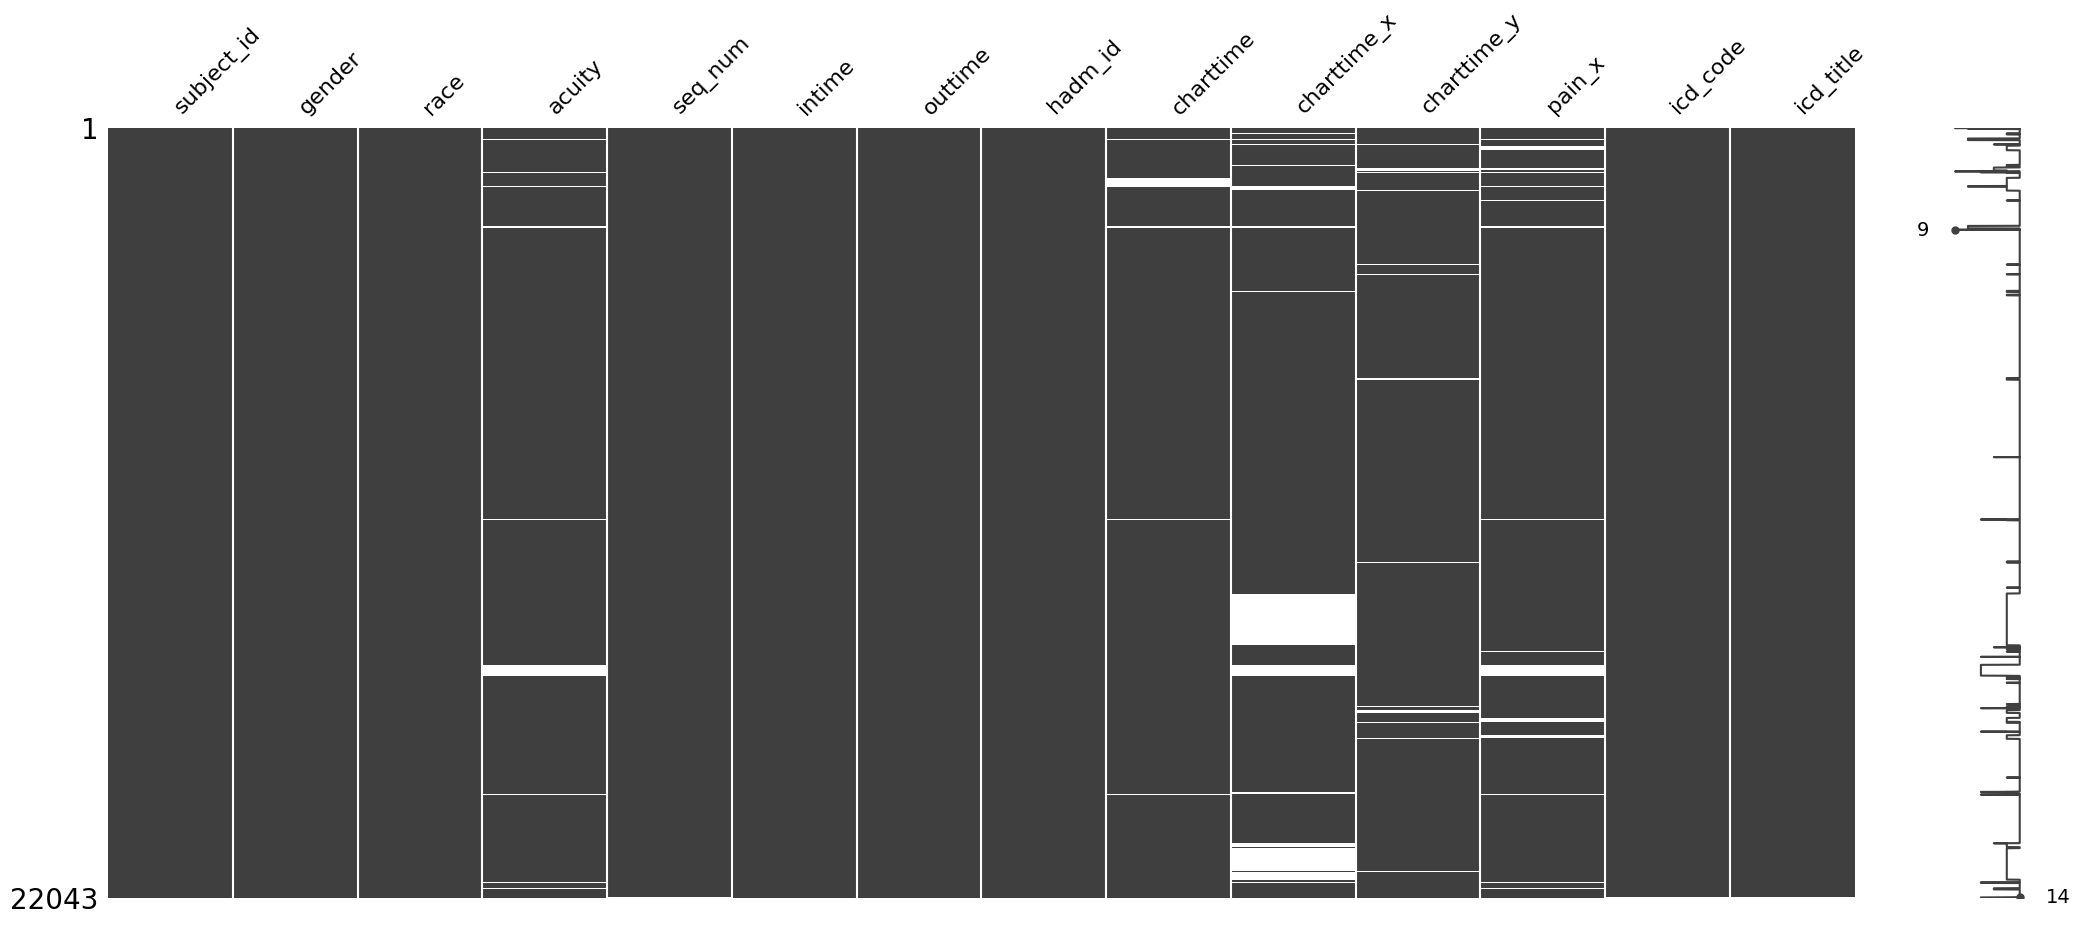

In [28]:
msno.matrix(time)

In [29]:
# Here I changed the hadm_id wich identifies if the patient was admitted to hospitalization (1) or not (0) instead of an id record for hospitalization.
time.loc[time['hadm_id'] > 1, 'hadm_id'] = 1

In [30]:
time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22043 entries, 0 to 284759
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subject_id   22043 non-null  int64  
 1   gender       22043 non-null  object 
 2   race         22043 non-null  object 
 3   acuity       21472 non-null  float64
 4   seq_num      22025 non-null  float64
 5   intime       22043 non-null  object 
 6   outtime      22043 non-null  object 
 7   hadm_id      22043 non-null  float64
 8   charttime    21618 non-null  object 
 9   charttime_x  18778 non-null  object 
 10  charttime_y  21463 non-null  object 
 11  pain_x       21057 non-null  object 
 12  icd_code     22025 non-null  object 
 13  icd_title    22025 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 2.5+ MB


In [31]:
# Most of the times are in 'object' format. So let's change to the correct data type:
columns_to_convert = ['intime', 'outtime', 'charttime', 'charttime_x', 'charttime_y']

for column in columns_to_convert:
  time.loc[:, column] = pd.to_datetime(time.loc[:, column])


In [32]:
time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22043 entries, 0 to 284759
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   subject_id   22043 non-null  int64         
 1   gender       22043 non-null  object        
 2   race         22043 non-null  object        
 3   acuity       21472 non-null  float64       
 4   seq_num      22025 non-null  float64       
 5   intime       22043 non-null  datetime64[ns]
 6   outtime      22043 non-null  datetime64[ns]
 7   hadm_id      22043 non-null  float64       
 8   charttime    21618 non-null  datetime64[ns]
 9   charttime_x  18778 non-null  datetime64[ns]
 10  charttime_y  21463 non-null  datetime64[ns]
 11  pain_x       21057 non-null  object        
 12  icd_code     22025 non-null  object        
 13  icd_title    22025 non-null  object        
dtypes: datetime64[ns](5), float64(3), int64(1), object(5)
memory usage: 2.5+ MB


In [33]:
# Calculate the duration of each patient's stay in hours
time['duration'] = time['outtime'] - time['intime']

# Calculate the average duration of all patients' stays
average_duration = time['duration'].mean()

# Calculate the minimum and maximum duration of all patients' stays
min_duration = time['duration'].min()
max_duration = time['duration'].max()

# Calculate the number of patients admitted each day
time['admission_date'] = time['intime'].dt.date
admissions_per_day = time['admission_date'].value_counts().sort_index()

print(f"The average duration of all patients' stays is {average_duration}")
print(f"The minimum duration of all patients' stays is {min_duration}")
print(f"The maximum duration of all patients' stays is {max_duration}")
print("The number of patients admitted each day is:")
print(admissions_per_day)

The average duration of all patients' stays is 0 days 14:30:20.274009889
The minimum duration of all patients' stays is 0 days 00:04:00
The maximum duration of all patients' stays is 3 days 02:20:00
The number of patients admitted each day is:
2112-09-17      1
2113-12-13      8
2115-11-08      2
2116-02-27     10
2116-06-26      8
             ... 
2200-09-17     54
2201-02-12     54
2201-03-23    420
2201-07-07     64
2201-10-30      1
Name: admission_date, Length: 221, dtype: int64


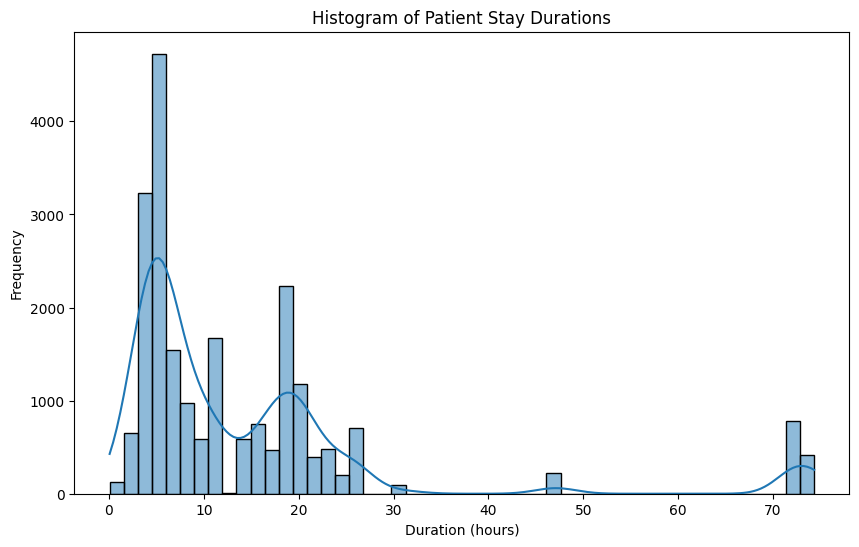

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the duration of each patient's stay in hours
time['duration'] = (time['outtime'] - time['intime']).dt.total_seconds() / 3600

# 1. Histogram of durations
plt.figure(figsize=(10, 6))
sns.histplot(time['duration'], bins=50, kde=True)
plt.title('Histogram of Patient Stay Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

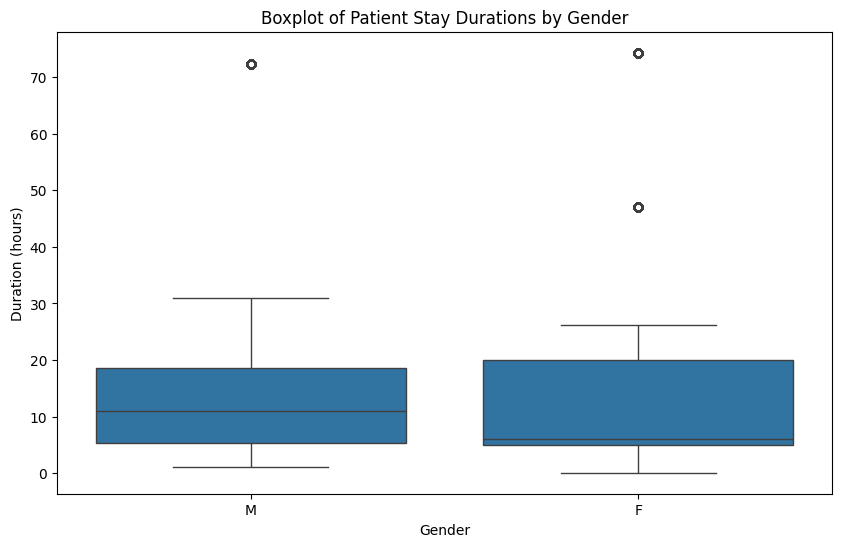

In [37]:
# 2. Boxplot of durations by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='duration', data=time)
plt.title('Boxplot of Patient Stay Durations by Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (hours)')
plt.show()

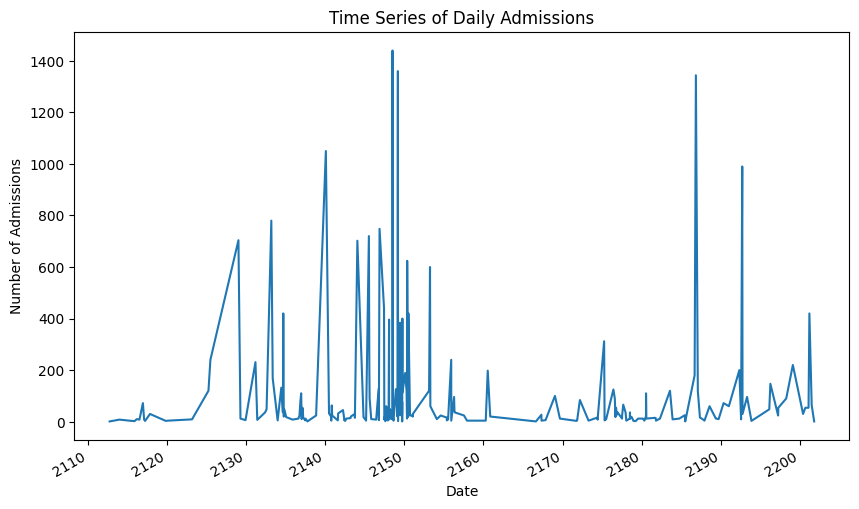

In [38]:
# 3. Time series of daily admissions
time['intime'] = pd.to_datetime(time['intime'])
time['admission_date'] = time['intime'].dt.normalize()

admissions_per_day = time['admission_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
admissions_per_day.plot()
plt.title('Time Series of Daily Admissions')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.show()

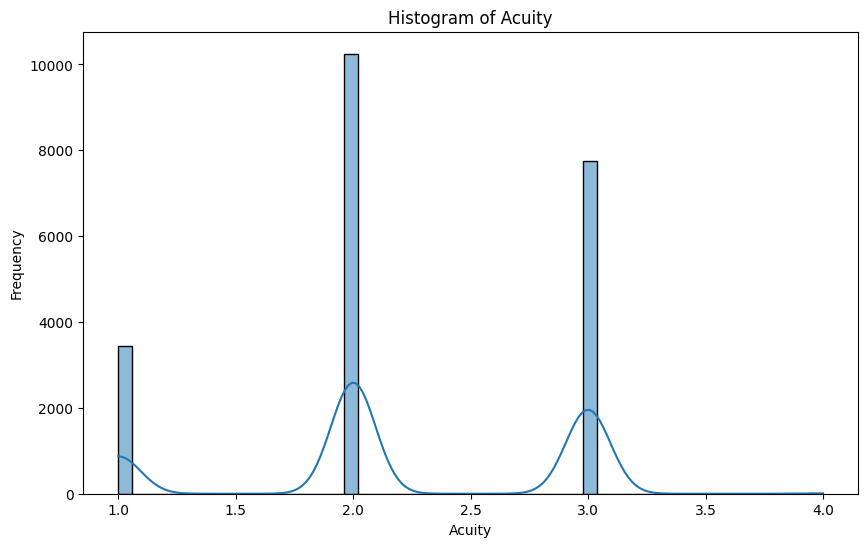

In [39]:
# 4. Histogram of acuity
plt.figure(figsize=(10, 6))
sns.histplot(time['acuity'], bins=50, kde=True)
plt.title('Histogram of Acuity')
plt.xlabel('Acuity')
plt.ylabel('Frequency')
plt.show()

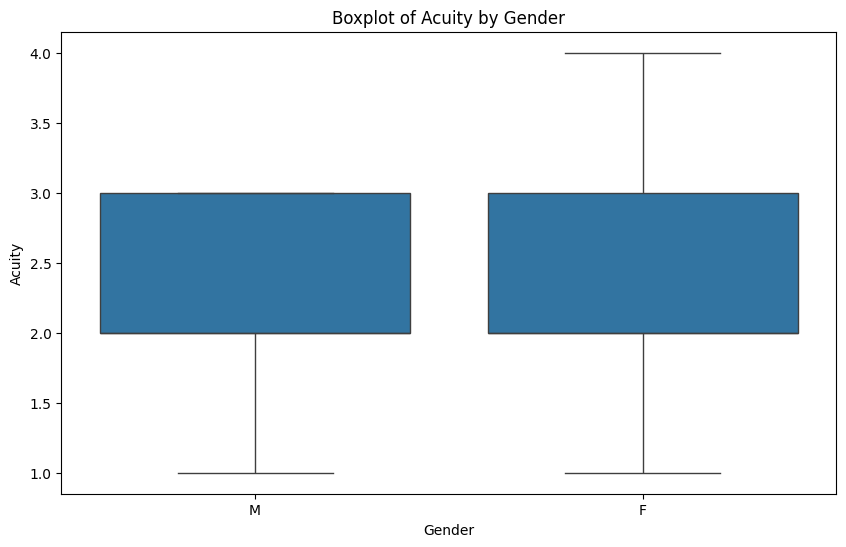

In [40]:
# 5. Boxplot of acuity by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='acuity', data=time)
plt.title('Boxplot of Acuity by Gender')
plt.xlabel('Gender')
plt.ylabel('Acuity')
plt.show()

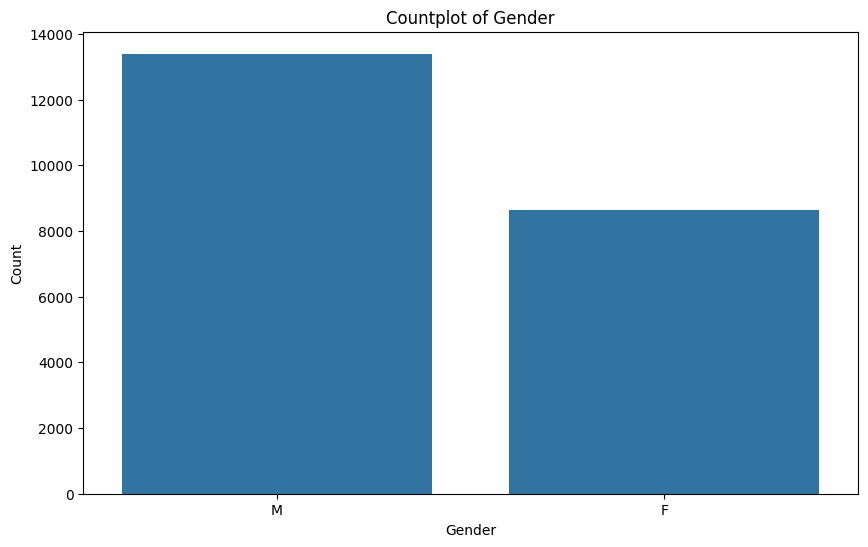

In [41]:
# 6. Countplot of gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=time)
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

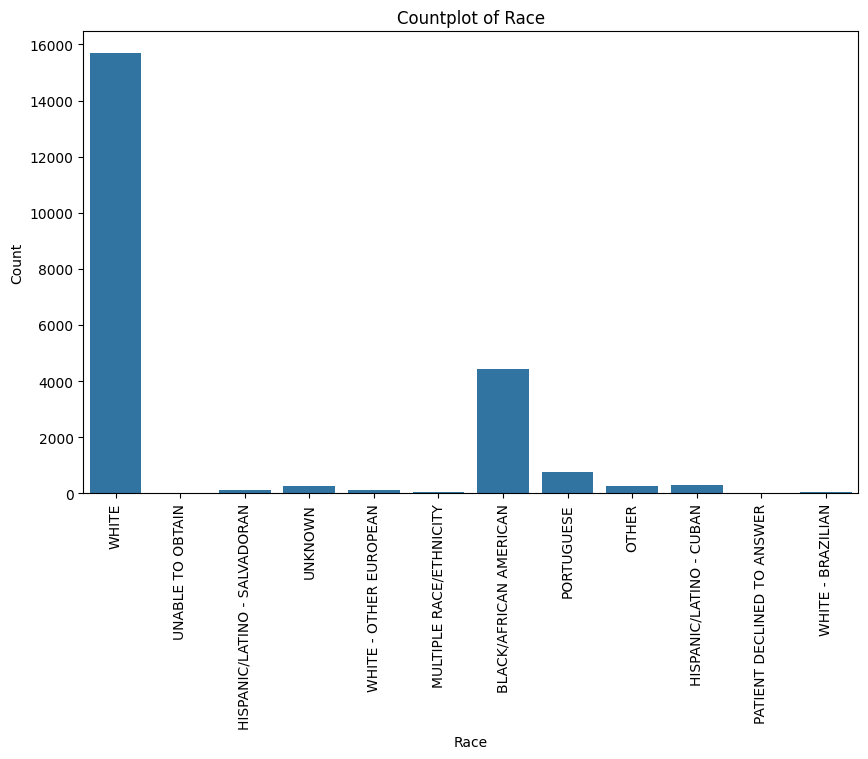

In [47]:
# 7. Countplot of race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=time)
plt.title('Countplot of Race')
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

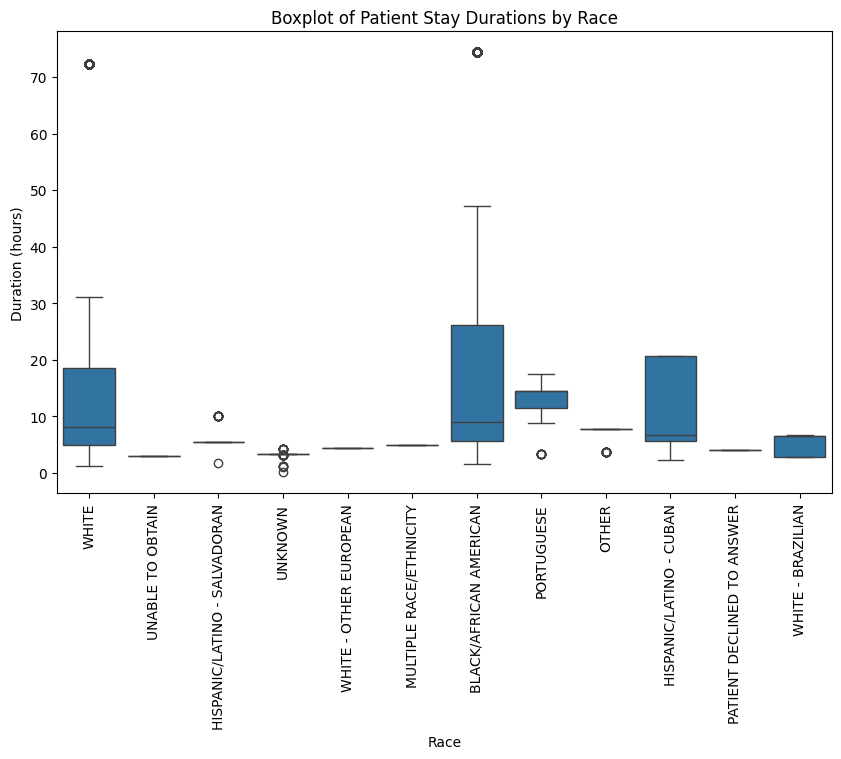

In [48]:
# 8. Boxplot of durations by race
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='duration', data=time)
plt.title('Boxplot of Patient Stay Durations by Race')
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Duration (hours)')
plt.show()

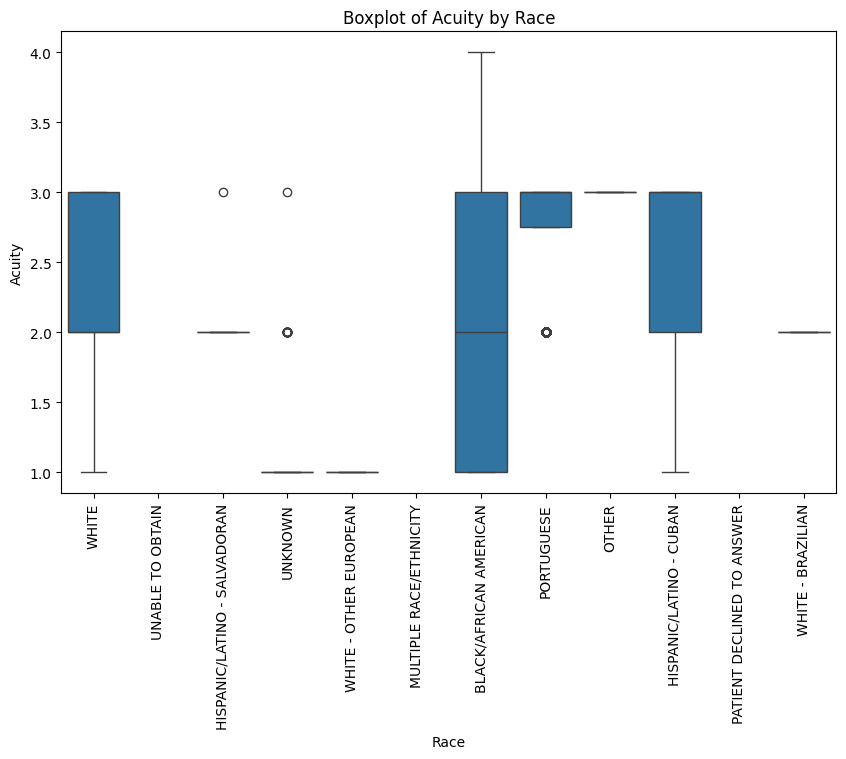

In [49]:
# 9. Boxplot of acuity by race
plt.figure(figsize=(10, 6))
sns.boxplot(x='race', y='acuity', data=time)
plt.title('Boxplot of Acuity by Race')
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Acuity')
plt.show()

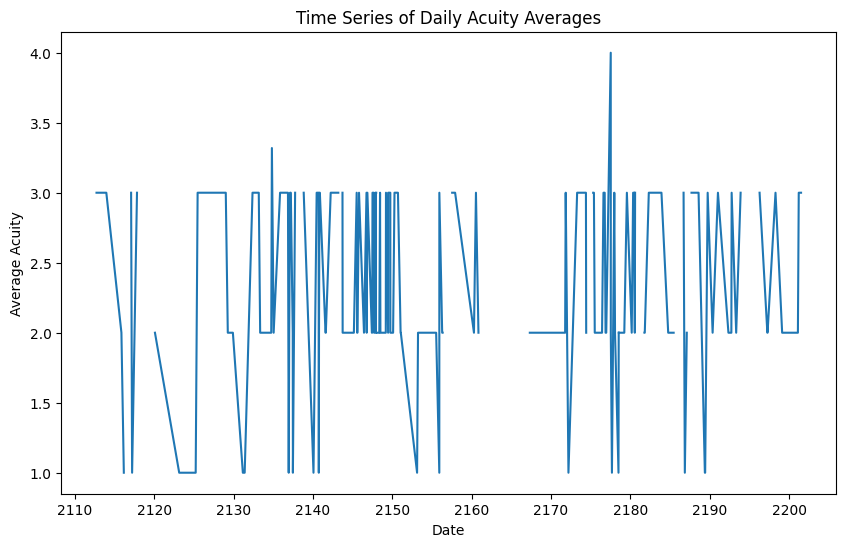

In [45]:
# 10. Time series of daily acuity averages
time['acuity_date'] = time['intime'].dt.date
acuity_per_day = time.groupby('acuity_date')['acuity'].mean()

plt.figure(figsize=(10, 6))
acuity_per_day.plot()
plt.title('Time Series of Daily Acuity Averages')
plt.xlabel('Date')
plt.ylabel('Average Acuity')
plt.show()